# Linear Regression model With Categorical Values

* The dataset exist in kaggle on : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

    and we just use 100 rows as a sample

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
exam_df=pd.read_csv("datasets/exams.csv")
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


In [3]:
len(exam_df)

100

## Standardizing Numeric Data

In [4]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [5]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [6]:
from sklearn import preprocessing

exam_df['math score']= preprocessing.scale(exam_df[['math score']].astype('Float64'))
exam_df['reading score']= preprocessing.scale(exam_df[['reading score']].astype('float64'))

exam_df['writing score']= preprocessing.scale(exam_df[['writing score']].astype('Float64'))

Standarization a datset to have 0 mean and unit variance - this allow us to compare values across different distributions

In [7]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


- Positive scores => are those that are above the mean

- negative scores => are those that are below the mean

In [8]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.753353e-16,-3.004541e-16,-4.912737e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


* Mean is close to zero , and std is close to 1

    and this what Standarization has done

## Label Encoding and One-hot Encoding Categorical Data

Let's Shaabanlize our data :)

In [9]:
exam_df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [10]:
# Let's Order them first
parent_level_of_edu=[
    'some high school', 
    'high school',
    'some college', 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree" 
]

In [11]:
label_encoding= preprocessing.LabelEncoder()
label_encoding=label_encoding.fit(parent_level_of_edu)

In [12]:
# Let's Transfrom ..
exam_df['parental level of education']= \
    label_encoding.fit_transform(exam_df['parental level of education'].astype(str))

In [13]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [14]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

Categorical Values with no intrinsic order can be converted to numeric values using one-hot encoding

In [15]:
exam_df=pd.get_dummies(exam_df,columns=['race/ethnicity'])
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,False,False,False,False,True
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,False,False,True,False,False
2,male,2,standard,none,0.531729,0.147836,-0.076964,False,False,False,False,True
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,False,True,False,False,False
4,female,1,standard,completed,0.017360,0.440580,0.733181,False,True,False,False,False


In [16]:
exam_df= pd.get_dummies(exam_df,columns=['gender', 'lunch','test preparation course'])

In [17]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,False,False,False,False,True,True,False,False,True,False,True
1,4,-1.268562,-1.315885,-1.292181,False,False,True,False,False,True,False,False,True,False,True
2,2,0.531729,0.147836,-0.076964,False,False,False,False,True,False,True,False,True,False,True
3,4,-1.461450,-1.315885,-1.022132,False,True,False,False,False,True,False,True,False,True,False
4,1,0.017360,0.440580,0.733181,False,True,False,False,False,True,False,False,True,True,False


## Linear Regression and the Dummy Trap

In [18]:
from sklearn.model_selection import train_test_split

X= exam_df.drop('math score',axis=1)

Y= exam_df['math score']

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)


In [20]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [21]:
y_train.shape, y_test.shape

((80,), (20,))

In [23]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [24]:
print(f"Training Score: {linear_model.score(x_train,y_train)}" )

Training Score: 0.8941408812398465


In [25]:
from sklearn.metrics import r2_score

y_pred= linear_model.predict(x_test)

print(f"Testing Score : {r2_score(y_test,y_pred)}")

Testing Score : 0.8445910500117684


In [26]:
df_pred_actual= pd.DataFrame({'Predicted':y_pred, 'Actual':y_test})
df_pred_actual.head()

,Predicted,Actual
84,0.451897,0.596025
78,0.636988,1.303282
57,-0.577130,-1.204266
88,-0.877524,-0.882786
42,-0.662381,-0.497009


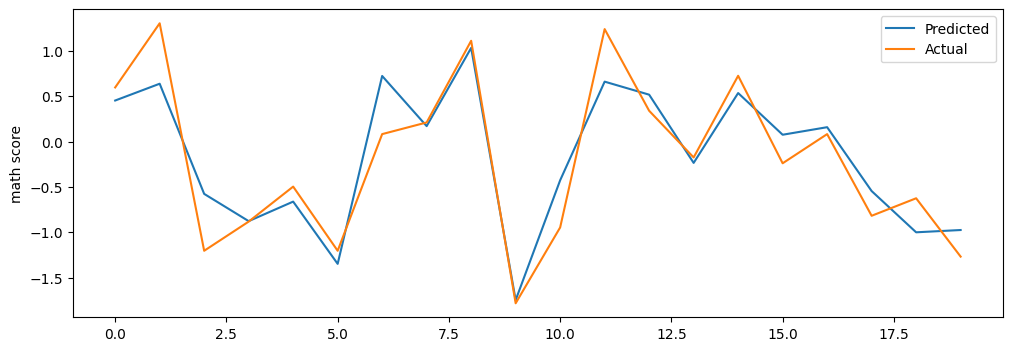

In [29]:
plt.figure(figsize=(12,4))

plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')

plt.ylabel('math score')

plt.legend()
plt.show()

Let's try a thing

Precit the math socre without using any of the other socre

In [31]:
X= exam_df.drop(columns=['math score','reading score','writing score'],axis=1)
Y= exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

linear_model= LinearRegression(fit_intercept=True).fit(x_train,y_train)

print(f'Training Score : {linear_model.score(x_train,y_train)}')
y_pred = linear_model.predict(x_test)
print(f'Test Score : {r2_score(y_test,y_pred)}')

Training Score : 0.3815759685782073
Test Score : -0.24599634642061785


Very bad model => 'cause the other scores have higher predictive power for the math socre

Let's try another one with little different 

* Predict the math score using the reading score along with other features

In [32]:
X= exam_df.drop(columns=['math score','writing score'],axis=1)
Y= exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

linear_model= LinearRegression(fit_intercept=True).fit(x_train,y_train)

print(f'Training Score : {linear_model.score(x_train,y_train)}')
y_pred = linear_model.predict(x_test)
print(f'Test Score : {r2_score(y_test,y_pred)}')

Training Score : 0.8489494184441598
Test Score : 0.753560819404316
